# Classification Machine Learning Modeling for Heart Attack Prediction

In [155]:
import pandas as pd
import numpy as np
from time import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC as SVM
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.dummy import DummyClassifier
from sklearn.inspection import permutation_importance

In [156]:
hearts = pd.read_csv('data/heart.csv')

In [157]:
hearts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### About this Dataset

age: Age of the patient

sex: Sex of the patient (0 = female, 1 = male)

cp: Chest pain type (0 = Typical angina, 1 = Atypical angina, 2 = Non-anginal pain, 3 = Asymptomatic)
*angina is defined as a type of chest pain caused by reduced blood flow to the heart

trtbps: Resting blood pressure (in mm Hg)

chol: Cholesterol in mg/dl

fbs: 1 (True) if fasting blood sugar > 120 mg/dl, 0 (False) if not

restecg: Resting electrocardiographic results (0 = normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy)

thalachh: Maximum heart rate achieved

oldpeak: Defined as 'ST depression induced by exercise relative to rest'

slp: Slope

caa: Number of major vessels

thall: Thallium stress result (0 = Normal blood flow, 1 = Abnormal blood flow during exercise, 2 = Low blood flow at rest, 3 = No thallium visible)

exng: Exercise induced angina (1 = Yes, 0 = No)

output: Target variable to predict if a person is prone to heart attack or not (1 = More prone, 0 = Not)

In [158]:
hearts.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


### Data Preparation and Initial Exploratory Analysis

Because this dataset has been well cleaned, there is no further preparation that needs to be done in order to make this data easier to process. All features are relevant to the target variable, and there are no null entries to account for.

In [159]:
numerical_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'slp', 'caa', 'thall', 'exng']

In [160]:
hearts[numerical_features].describe()

,age,trtbps,chol,thalachh,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


C:\Users\anthony\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, 'Distribution of Age Relative to Output')]

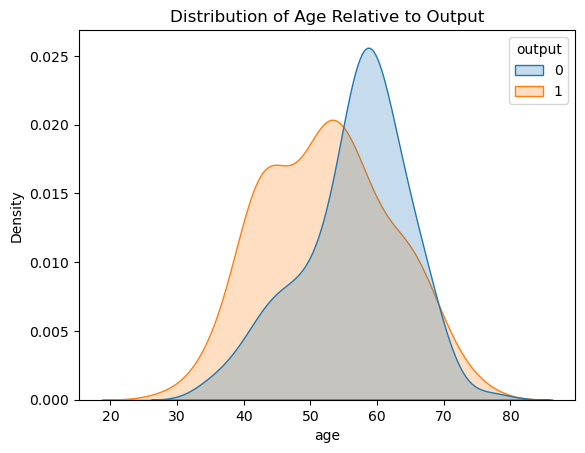

In [161]:
# create a kde plot for each numerical feature listed above relative to likelihood of heart attack
sns.kdeplot(data=hearts, x='age', hue='output', fill=True).set(title='Distribution of Age Relative to Output')

C:\Users\anthony\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, 'Distribution of Resting Blood Pressure Relative to Output')]

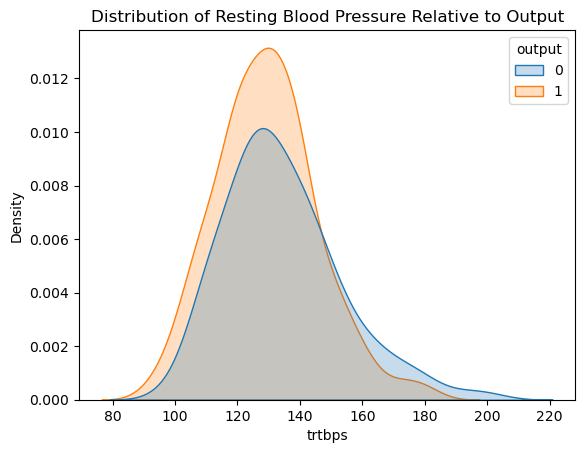

In [162]:
sns.kdeplot(data=hearts, x='trtbps', hue='output', fill=True).set(title='Distribution of Resting Blood Pressure Relative to Output')

C:\Users\anthony\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, 'Distribution of Cholesterol Relative to Output')]

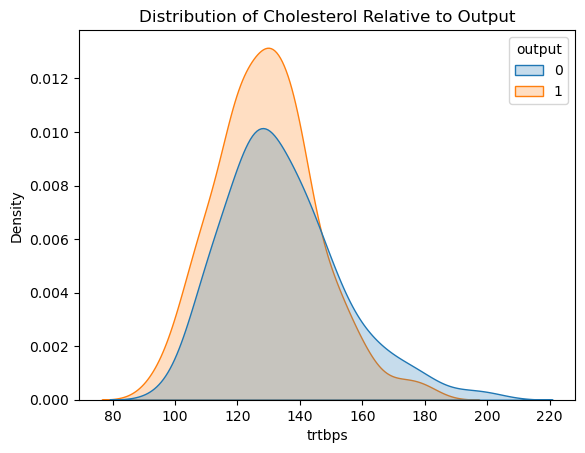

In [163]:
sns.kdeplot(data=hearts, x='trtbps', hue='output', fill=True).set(title='Distribution of Cholesterol Relative to Output')

C:\Users\anthony\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, 'Distribution of Max Heart Rate Relative to Output')]

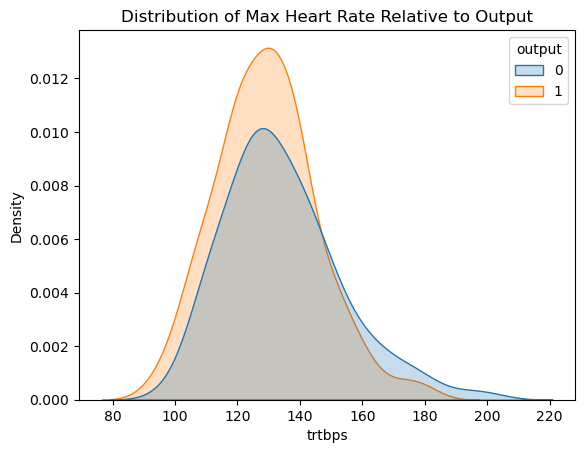

In [164]:
sns.kdeplot(data=hearts, x='trtbps', hue='output', fill=True).set(title='Distribution of Max Heart Rate Relative to Output')

C:\Users\anthony\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, 'Distribution of Oldpeak Relative to Output')]

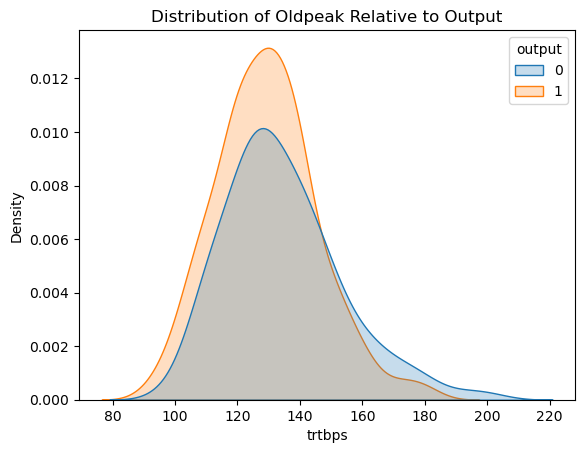

In [165]:
sns.kdeplot(data=hearts, x='trtbps', hue='output', fill=True).set(title='Distribution of Oldpeak Relative to Output')

[Text(0.5, 1.0, 'Countplot of Sex')]

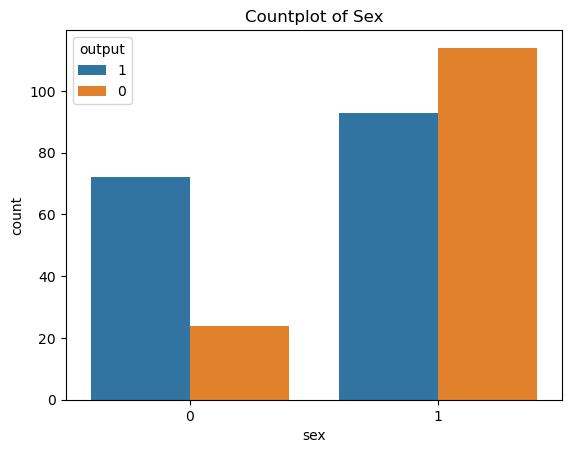

In [166]:
# create countplot for each categorical feature above
sns.countplot(x='sex', hue=hearts['output'].astype(str), data=hearts).set(title='Countplot of Sex')

[Text(0.5, 1.0, 'Countplot of Chest Pain')]

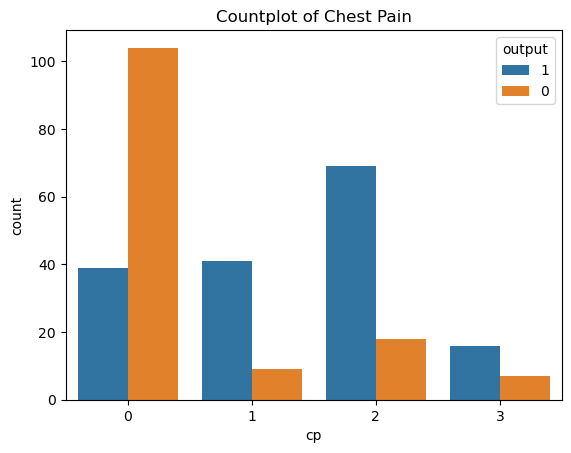

In [167]:
sns.countplot(x='cp', hue=hearts['output'].astype(str), data=hearts).set(title='Countplot of Chest Pain')

[Text(0.5, 1.0, 'Countplot of Fasting Blood Sugar')]

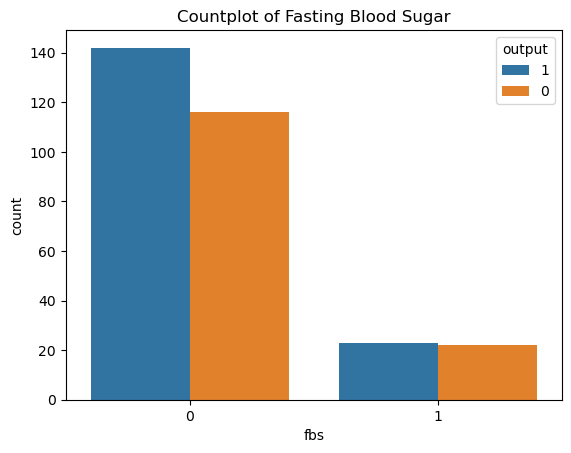

In [168]:
sns.countplot(x='fbs', hue=hearts['output'].astype(str), data=hearts).set(title='Countplot of Fasting Blood Sugar')

[Text(0.5, 1.0, 'Countplot of Resting Electrocardiograph Results')]

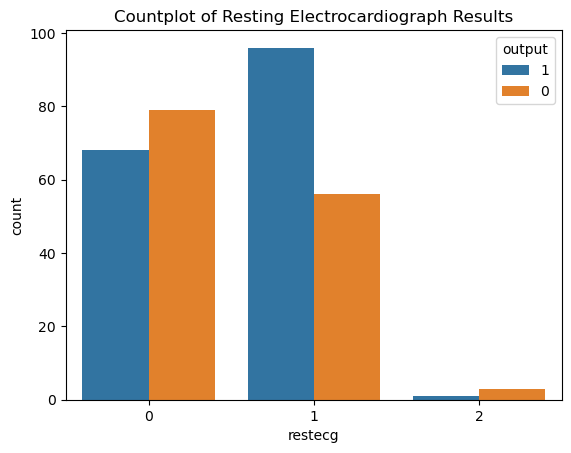

In [169]:
sns.countplot(x='restecg', hue=hearts['output'].astype(str), data=hearts).set(title='Countplot of Resting Electrocardiograph Results')

[Text(0.5, 1.0, 'Countplot of Slope')]

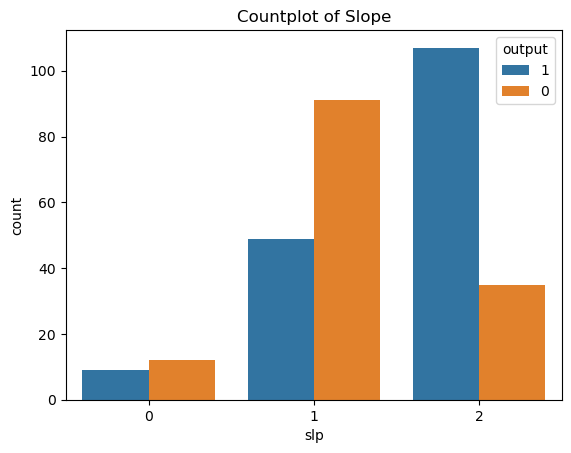

In [170]:
sns.countplot(x='slp', hue=hearts['output'].astype(str), data=hearts).set(title='Countplot of Slope')

[Text(0.5, 1.0, 'Countplot of # of Major Vessels')]

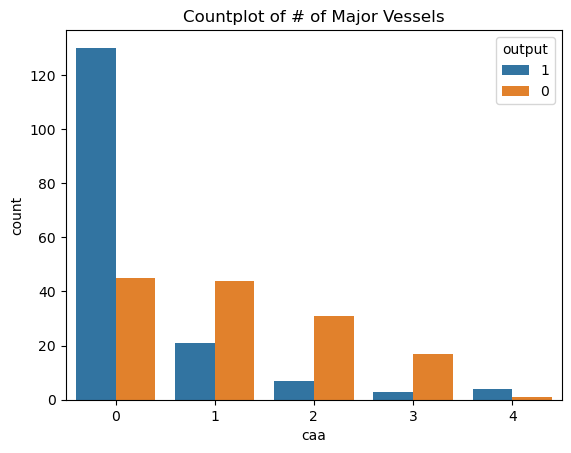

In [171]:
sns.countplot(x='caa', hue=hearts['output'].astype(str), data=hearts).set(title='Countplot of # of Major Vessels')

[Text(0.5, 1.0, 'Countplot of Thalium Stress Results')]

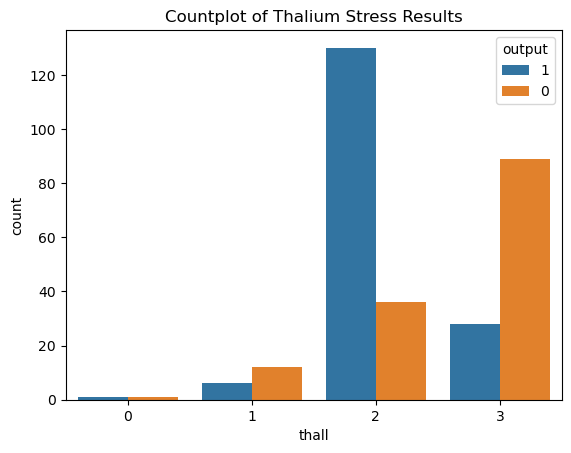

In [172]:
sns.countplot(x='thall', hue=hearts['output'].astype(str), data=hearts).set(title='Countplot of Thalium Stress Results')

[Text(0.5, 1.0, 'Countplot of Exercise-Induced Angina')]

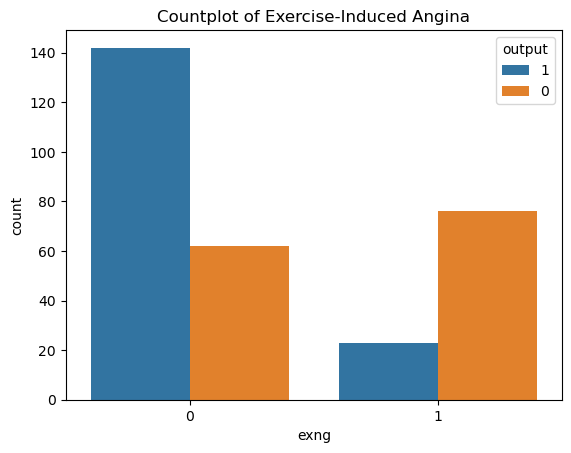

In [173]:
sns.countplot(x='exng', hue=hearts['output'].astype(str), data=hearts).set(title='Countplot of Exercise-Induced Angina')

[Text(0.5, 1.0, 'Countplot of Output')]

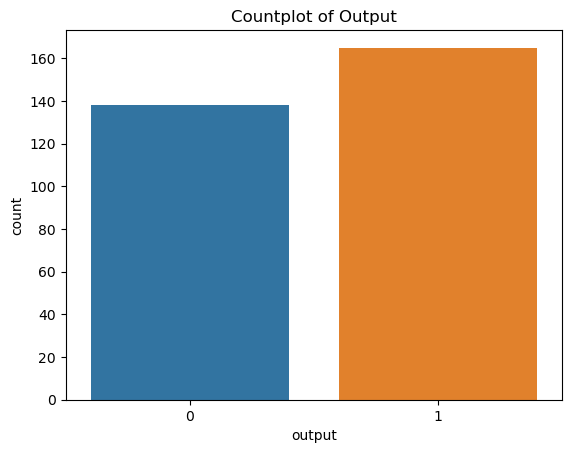

In [174]:
# create countplot of target variable
sns.countplot(x='output', data=hearts).set(title='Countplot of Output')

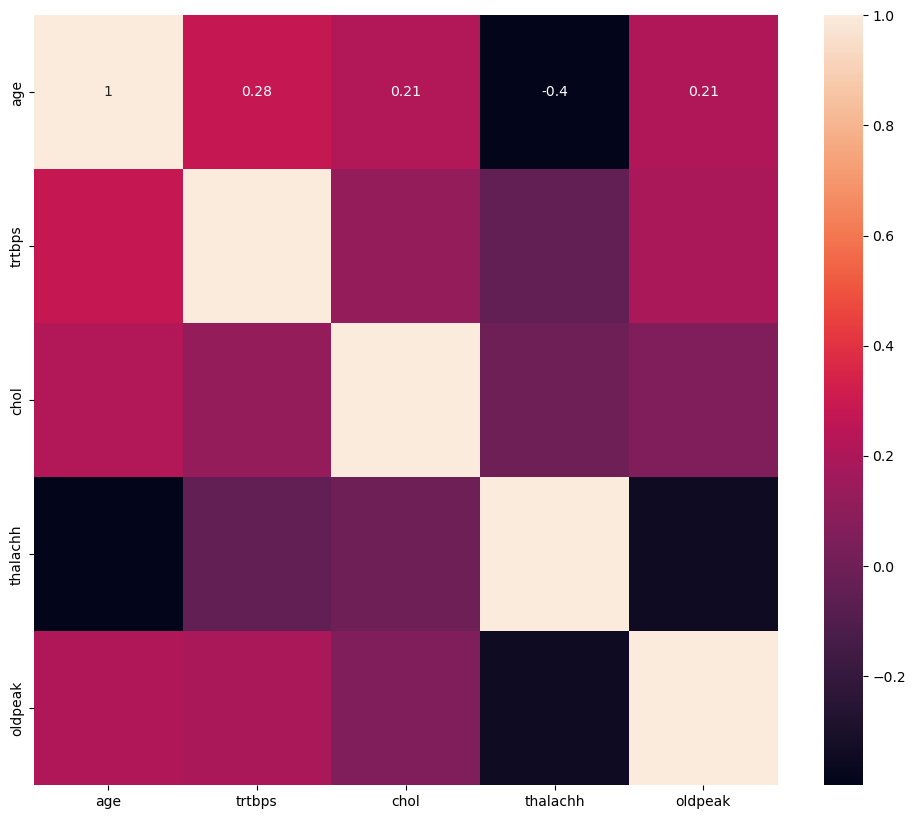

In [175]:
corr_matrix = hearts[numerical_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True)
plt.show()

### Findings from Data Analysis

1. Amongst the numerical variables, the only significant finding was that distribution of age for those not likely to be prone to heart attack was higher than the distribution of age for those who were. This is intuitive, as people with higher probability for heart attack likely have accompanying negative health factors, leading to a lower average age.

2. There were twice as many males than females in this dataset. Females were 3.5x more likely to be prone to heart attack than not in this dataset, whereas males were more even this regard.

3. Individuals with typical angina were 2.5x less likely to be prone to heart attack than not. However, those with anything but typical angina (atypical angina, non-anginal pain, asymptomatic) were very likely to be prone to heart attack.

4. Having a value of 1 on the resting electrocardiographic results, signifying ST-T wave abnormality, or a value of 2 for slope, is a big indicator of being prone to heart attack.

5. Individuals with at least 1 major vessel are far less likely to be prone to heart attack than those with 0 major blood vessels.

6. Counterintuitively, those with a value of 3 in the Thallium stress test (no thallium visible) are less prone to heart attacks than individuals with low blood flow during rest. This may be because those with no thallium visible indicates that they have already had a prior heart attack. Moreover, we see that there are virtually no individuals with scores of 0. This means that the vast majority of individuals in this dataset have some sort of coronary artery disease.

7. Another counterintuitive finding was that those without exercise-induced angina are almost 2.5x more likely to be prone to heart attacks, whereas those that do have it are 4x less likely to have a heart attack.

### Building Models

In [176]:
# encode the categorical features
hearts_model = pd.get_dummies(hearts, columns=categorical_features, drop_first=True)

# define the features vs the output variable
X = hearts_model.drop(['output'], axis=1)
y = hearts_model['output']

# scale the numerical features
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

In [177]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        303 non-null    float64
 1   trtbps     303 non-null    float64
 2   chol       303 non-null    float64
 3   thalachh   303 non-null    float64
 4   oldpeak    303 non-null    float64
 5   sex_1      303 non-null    bool   
 6   cp_1       303 non-null    bool   
 7   cp_2       303 non-null    bool   
 8   cp_3       303 non-null    bool   
 9   fbs_1      303 non-null    bool   
 10  restecg_1  303 non-null    bool   
 11  restecg_2  303 non-null    bool   
 12  slp_1      303 non-null    bool   
 13  slp_2      303 non-null    bool   
 14  caa_1      303 non-null    bool   
 15  caa_2      303 non-null    bool   
 16  caa_3      303 non-null    bool   
 17  caa_4      303 non-null    bool   
 18  thall_1    303 non-null    bool   
 19  thall_2    303 non-null    bool   
 20  thall_3   

In [178]:
X.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3,exng_1
0,0.952197,0.763956,-0.256334,0.015443,1.087338,True,False,False,True,True,...,False,False,False,False,False,False,True,False,False,False
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,True,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,False,True,False,False,False,...,False,True,False,False,False,False,False,True,False,False
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,True,True,False,False,False,...,False,True,False,False,False,False,False,True,False,False
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,True


In [179]:
# train and test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

X_train:  (242, 22)
X_test:  (61, 22)
y_train:  (242,)
y_test:  (61,)


In [180]:
# baseline Model
baseline = DummyClassifier(strategy="most_frequent", random_state=42).fit(X_train, y_train)
baseline_score = baseline.score(X_test, y_test)
print("Baseline score to beat is {:0.2f}%".format(baseline_score * 100))

Baseline score to beat is 52.46%


**From this point on, we will be utilizing 3 different classification models: KNN, decision tree, and SVM. We will be analyzing the test accuracy of each of these models, from which we will identify the most accurate model. Using this found model, we will identify the most impactful features in predicting the likelihood that an individual will have a heart attack and report on them.**

In [181]:
# instantiate a scorer object
scorer = make_scorer(accuracy_score)

KNN Test Accuracy: 85.25%


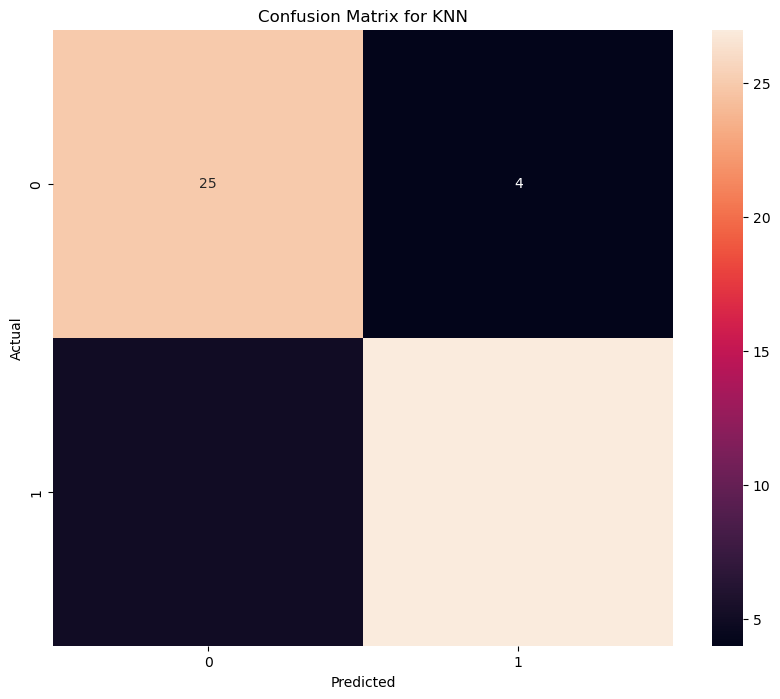

In [182]:
# KNN algorithm
KNN = KNeighborsClassifier()

param_grid = {'n_neighbors': [3, 5, 7, 9]}
knn_grid = GridSearchCV(KNN, param_grid, scoring=scorer, cv=3)
knn_grid.fit(X_train, y_train)

knn_test_accuracy = knn_grid.score(X_test, y_test)

print('KNN Test Accuracy: {:0.2f}%'.format(knn_test_accuracy * 100))

y_test_pred = grid.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN')
plt.show()

Decision Tree Test Accuracy: 73.77%


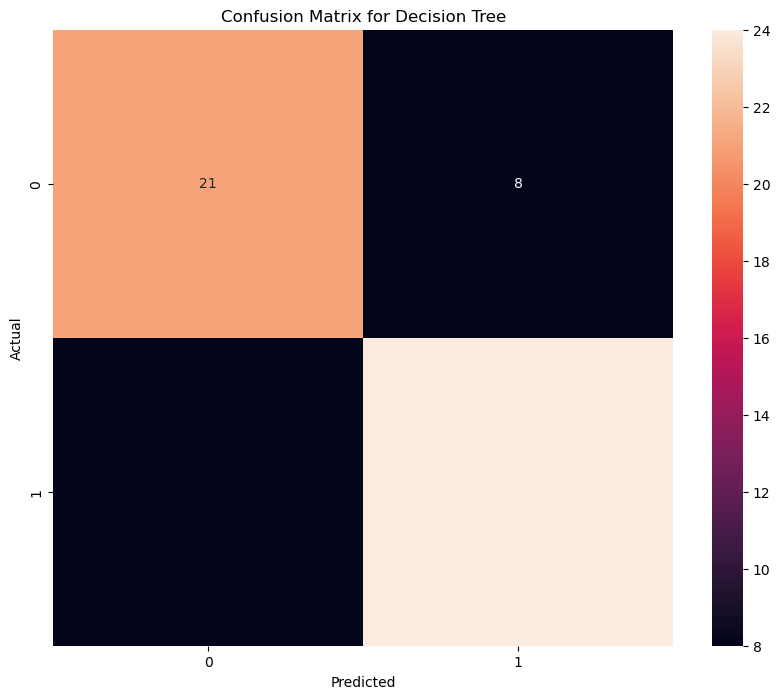

In [183]:
# Decision tree
decision_tree = DecisionTreeClassifier()

param_grid = {'max_depth': [3]}
grid = GridSearchCV(decision_tree, param_grid, scoring=scorer, cv=3)
grid.fit(X_train, y_train)

dt_test_accuracy = grid.score(X_test, y_test)

print('Decision Tree Test Accuracy: {:0.2f}%'.format(dt_test_accuracy * 100))

y_test_pred = grid.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

SVM Test Accuracy: 86.89%


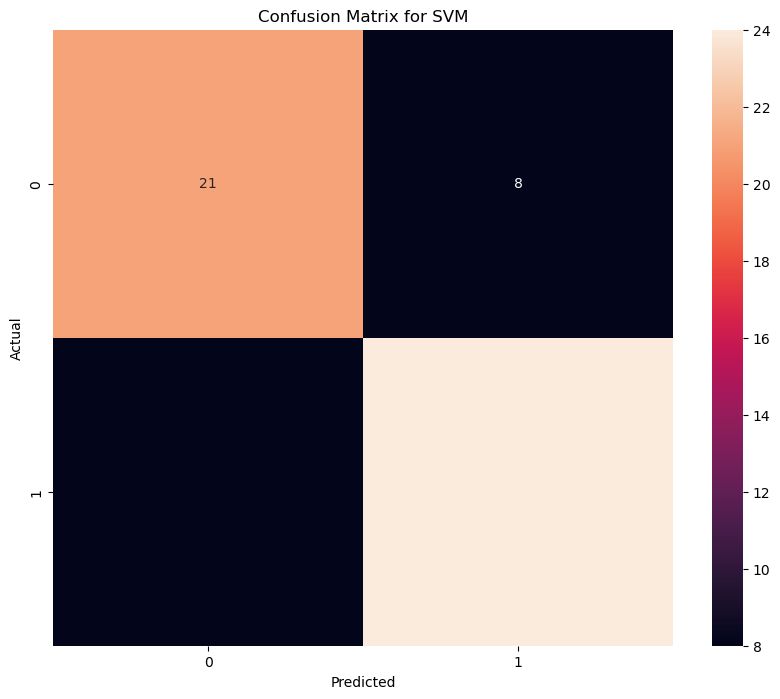

In [184]:
# SVM Model
svc = SVM()

param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}
svm_grid = GridSearchCV(SVC, param_grid, scoring=scorer, cv=3)
svm_grid.fit(X_train, y_train)

svm_test_accuracy = svm_grid.score(X_test, y_test)

print('SVM Test Accuracy: {:0.2f}%'.format(svm_test_accuracy * 100))

y_test_pred = grid.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM')
plt.show()

### Evaluation

While all three models were able to beat the baseline score provided by the DummyClassifier(), it is clear through the test accuracies and confusion matrices that SVM had the best performing model, with KNN being a close second. Because of this, we will use these two models and drop the decision tree algorithm to determine the most important features, cross-referencing them against each other to find which health characteristics are most crucial in deciding whether an individual is prone to heart attacks.

In [185]:
# most impactful features according to SVM model
result = permutation_importance(svm_grid.best_estimator_, X_test, y_test, n_repeats=10, random_state=42)

# Get the importance of each feature
feature_importances = result.importances_mean
important_features_indices = np.argsort(feature_importances)[-5:][::-1]
top_features = X_train.columns[important_features_indices]
top_importances = feature_importances[important_features_indices]

print("Top 5 Most Impactful Features for SVM Model:\n")
for feature, importance in zip(top_features, top_importances):
    print(f"{feature}: {importance:.4f}")

Top 5 Most Impactful Features for SVM Model:

oldpeak: 0.0508
thalachh: 0.0475
cp_2: 0.0393
exng_1: 0.0328
caa_2: 0.0230


In [186]:
# most impactful features according to KNN algorithm 
result = permutation_importance(knn_grid.best_estimator_, X_test, y_test, n_repeats=10, random_state=42)

# Get the most important features
feature_importances = result.importances_mean
important_features_indices = np.argsort(feature_importances)[-5:][::-1]
top_features = X_train.columns[important_features_indices]
top_importances = feature_importances[important_features_indices]

print("Top 5 Most Impactful Features for KNN Algorithm:\n")
for feature, importance in zip(top_features, top_importances):
    print(f"{feature}: {importance:.4f}")

Top 5 Most Impactful Features for KNN Algorithm:

thalachh: 0.0525
oldpeak: 0.0344
age: 0.0197
caa_1: 0.0164
cp_1: 0.0131
